In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sb
import networkx as nx
import keras
from keras import backend as K
import tensorflow as tf
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG, HTML, display

from nw2vec import ae
from nw2vec import utils

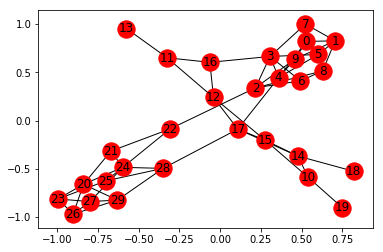

In [10]:
l = 3
k = 10
p_in = .4
p_out = .01
g = nx.planted_partition_graph(l, k, p_in, p_out)
nx.draw_networkx(g)

In [17]:
n_nodes = l * k
adj = nx.adjacency_matrix(g).todense().astype(np.float32)

n_ξ_samples = 10
dim_data, dim_l1, dim_z = 10, 5, 2
dims = (dim_data, dim_l1, dim_z)

q_input, q_model, q_codec = ae.build_q_model(adj, dims)
p_input, p_model, p_codecs = ae.build_p_model(adj, dims)
vae = ae.vae(adj, q_input, q_model, q_codec, n_ξ_samples, p_model, p_codecs)

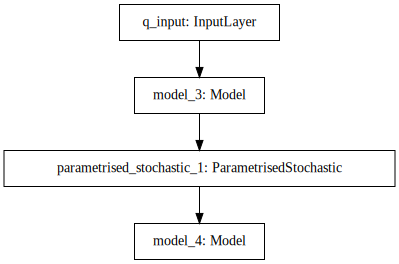

In [46]:
display(SVG(model_to_dot(vae).create(prog='dot', format='svg')))

model_3


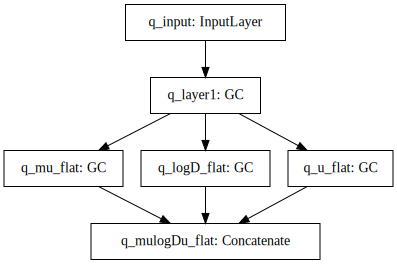

model_4


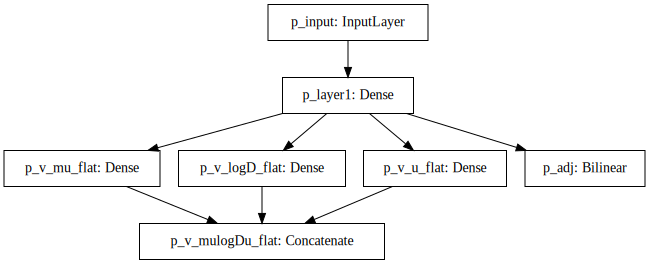

In [47]:
for layer in vae.layers:
    if not isinstance(layer, keras.Model):
        continue
    print(layer.name)
    display(SVG(model_to_dot(layer).create(prog='dot', format='svg')))

In [19]:
features = np.random.random((n_nodes, dim_data))

In [43]:
vae.fit(x=features,
        y=[np.zeros((n_nodes, dim_z)),
           utils.expand_dims_tile(utils.expand_dims_tile(adj, 0, n_ξ_samples), 0, n_nodes),
           utils.expand_dims_tile(features, -2, n_ξ_samples)],
        epochs=1000, batch_size=n_nodes)

Epoch 1/1000
30/30 [==============================] - 0s 2ms/step - loss: 20.1461 - model_3_loss: 1.7239 - model_4_loss_1: 12.5891 - model_4_loss_2: 5.5800
Epoch 2/1000
30/30 [==============================] - 0s 2ms/step - loss: 20.2165 - model_3_loss: 1.7388 - model_4_loss_1: 12.7140 - model_4_loss_2: 5.5106
Epoch 3/1000
30/30 [==============================] - 0s 2ms/step - loss: 19.9648 - model_3_loss: 1.7298 - model_4_loss_1: 12.5272 - model_4_loss_2: 5.4545
Epoch 4/1000
30/30 [==============================] - 0s 2ms/step - loss: 20.3370 - model_3_loss: 1.7390 - model_4_loss_1: 12.8313 - model_4_loss_2: 5.5133
Epoch 5/1000
30/30 [==============================] - 0s 2ms/step - loss: 19.9147 - model_3_loss: 1.7560 - model_4_loss_1: 12.5273 - model_4_loss_2: 5.3779
Epoch 6/1000
30/30 [==============================] - 0s 2ms/step - loss: 20.0120 - model_3_loss: 1.7554 - model_4_loss_1: 12.6237 - model_4_loss_2: 5.3793
Epoch 7/1000
30/30 [==============================] - 0s 2ms/ste

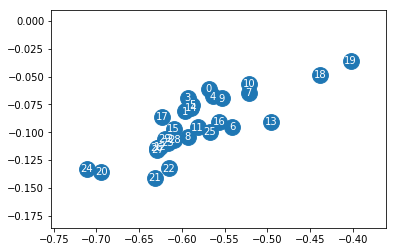

In [44]:
pred_μ = q_model.predict(features)[:, :2].T
plt.scatter(pred_μ[0], pred_μ[1], s=250)
for i, (x, y) in enumerate(pred_μ.T):
    plt.text(x, y, str(i), ha='center', va='center', color='white')

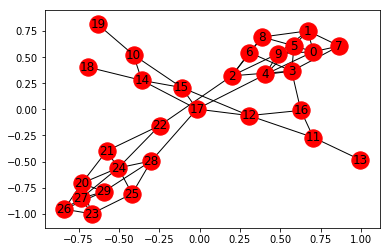

In [45]:
nx.draw_networkx(g)